In [15]:
# Re-import missing libraries due to kernel reset
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import numpy as np

### Create all 7 angles for a single class

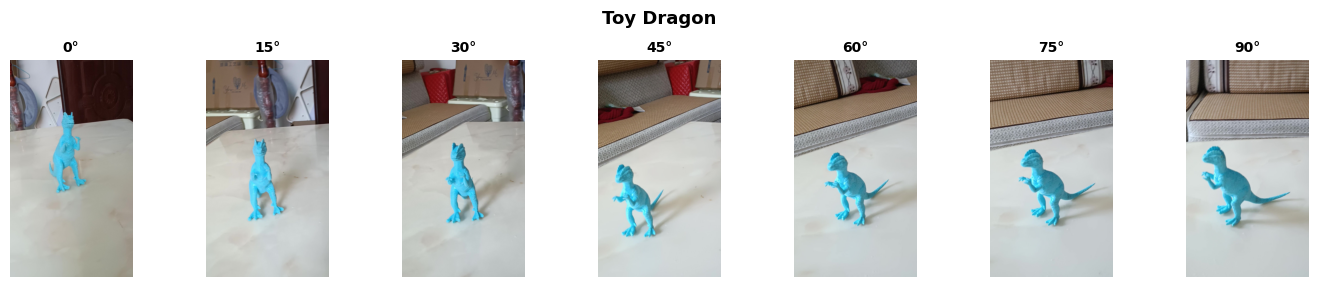

In [16]:
# --- CONFIGURATION ---
base_path = os.path.abspath(os.path.join(os.getcwd(), "..", "datasets", "split_angles_mvimagenet"))
class_id = 70
class_name = "Toy Dragon"
angle_degrees = [0, 15, 30, 45, 60, 75, 90]

class_mapping = {
    23: "Laptop", 46: "Bed", 19: "Microwave", 99: "Coat Rack", 126: "Sink", 125: "Toilet",
    8: "Sofa", 166: "Broccoli", 7: "Stove", 152: "Strings", 196: "Durian", 113: "Ceiling Lamp",
    70: "Toy Dragon", 60: "Toy Cow", 100: "Guitar Stand", 57: "Toy Cat"
}

manual_overrides = {
    "Sink": "4300efaa",
    "Strings": "1b00cfb0",
    "Microwave": "0a00c886",
    "Toy Cat": "0000a2fa",
    "Sofa": "0000b1ea",
    "Stove": "0b00bdbf"
}

# --- STEP 1: COLLECT 7 ANGLE IMAGES FOR TOY DRAGON ---

img_paths = []
valid_angles = []

img_id = manual_overrides.get(class_mapping[class_id])

for angle in angle_degrees:
    # print(os.path.join(base_path, str(class_id), str(angle), "img"))
    angle_path = os.path.join(base_path, str(class_id), str(angle), "img")
    if not os.path.exists(angle_path):
        continue

    if img_id:
        matching_files = [f for f in os.listdir(angle_path) if f.startswith(img_id)]
        if matching_files:
            img_paths.append(os.path.join(angle_path, matching_files[0]))
            valid_angles.append(angle)
    else:
        files = sorted([f for f in os.listdir(angle_path) if f.endswith(".jpg")])
        if len(files) >= 5:
            img_paths.append(os.path.join(angle_path, files[4]))
            valid_angles.append(angle)

# print("Collected paths:")
# for path in img_paths:
#     print(path)

# print("Valid angles:", valid_angles)

# --- STEP 2: VISUALIZE RESULTS ---

fig, axs = plt.subplots(1, len(angle_degrees), figsize=(len(angle_degrees) * 2, 3))
fig.subplots_adjust(hspace=0.3, wspace=0.1)

for i, angle in enumerate(angle_degrees):
    ax = axs[i]
    if angle in valid_angles:
        img_idx = valid_angles.index(angle)
        img = mpimg.imread(img_paths[img_idx])
        ax.imshow(img)
    ax.set_title(f"{angle}°", fontsize=10, fontweight='bold')
    ax.axis("off")

# Add the class name above the center image
center_col = len(angle_degrees) // 2
axs[center_col].text(
    0.5, 1.15, class_mapping[class_id],
    transform=axs[center_col].transAxes,
    ha='center', va='bottom',
    fontsize=13, fontweight='bold')

plt.tight_layout()
plt.show()


### Create vertical image of all angles from 1 instance for each category

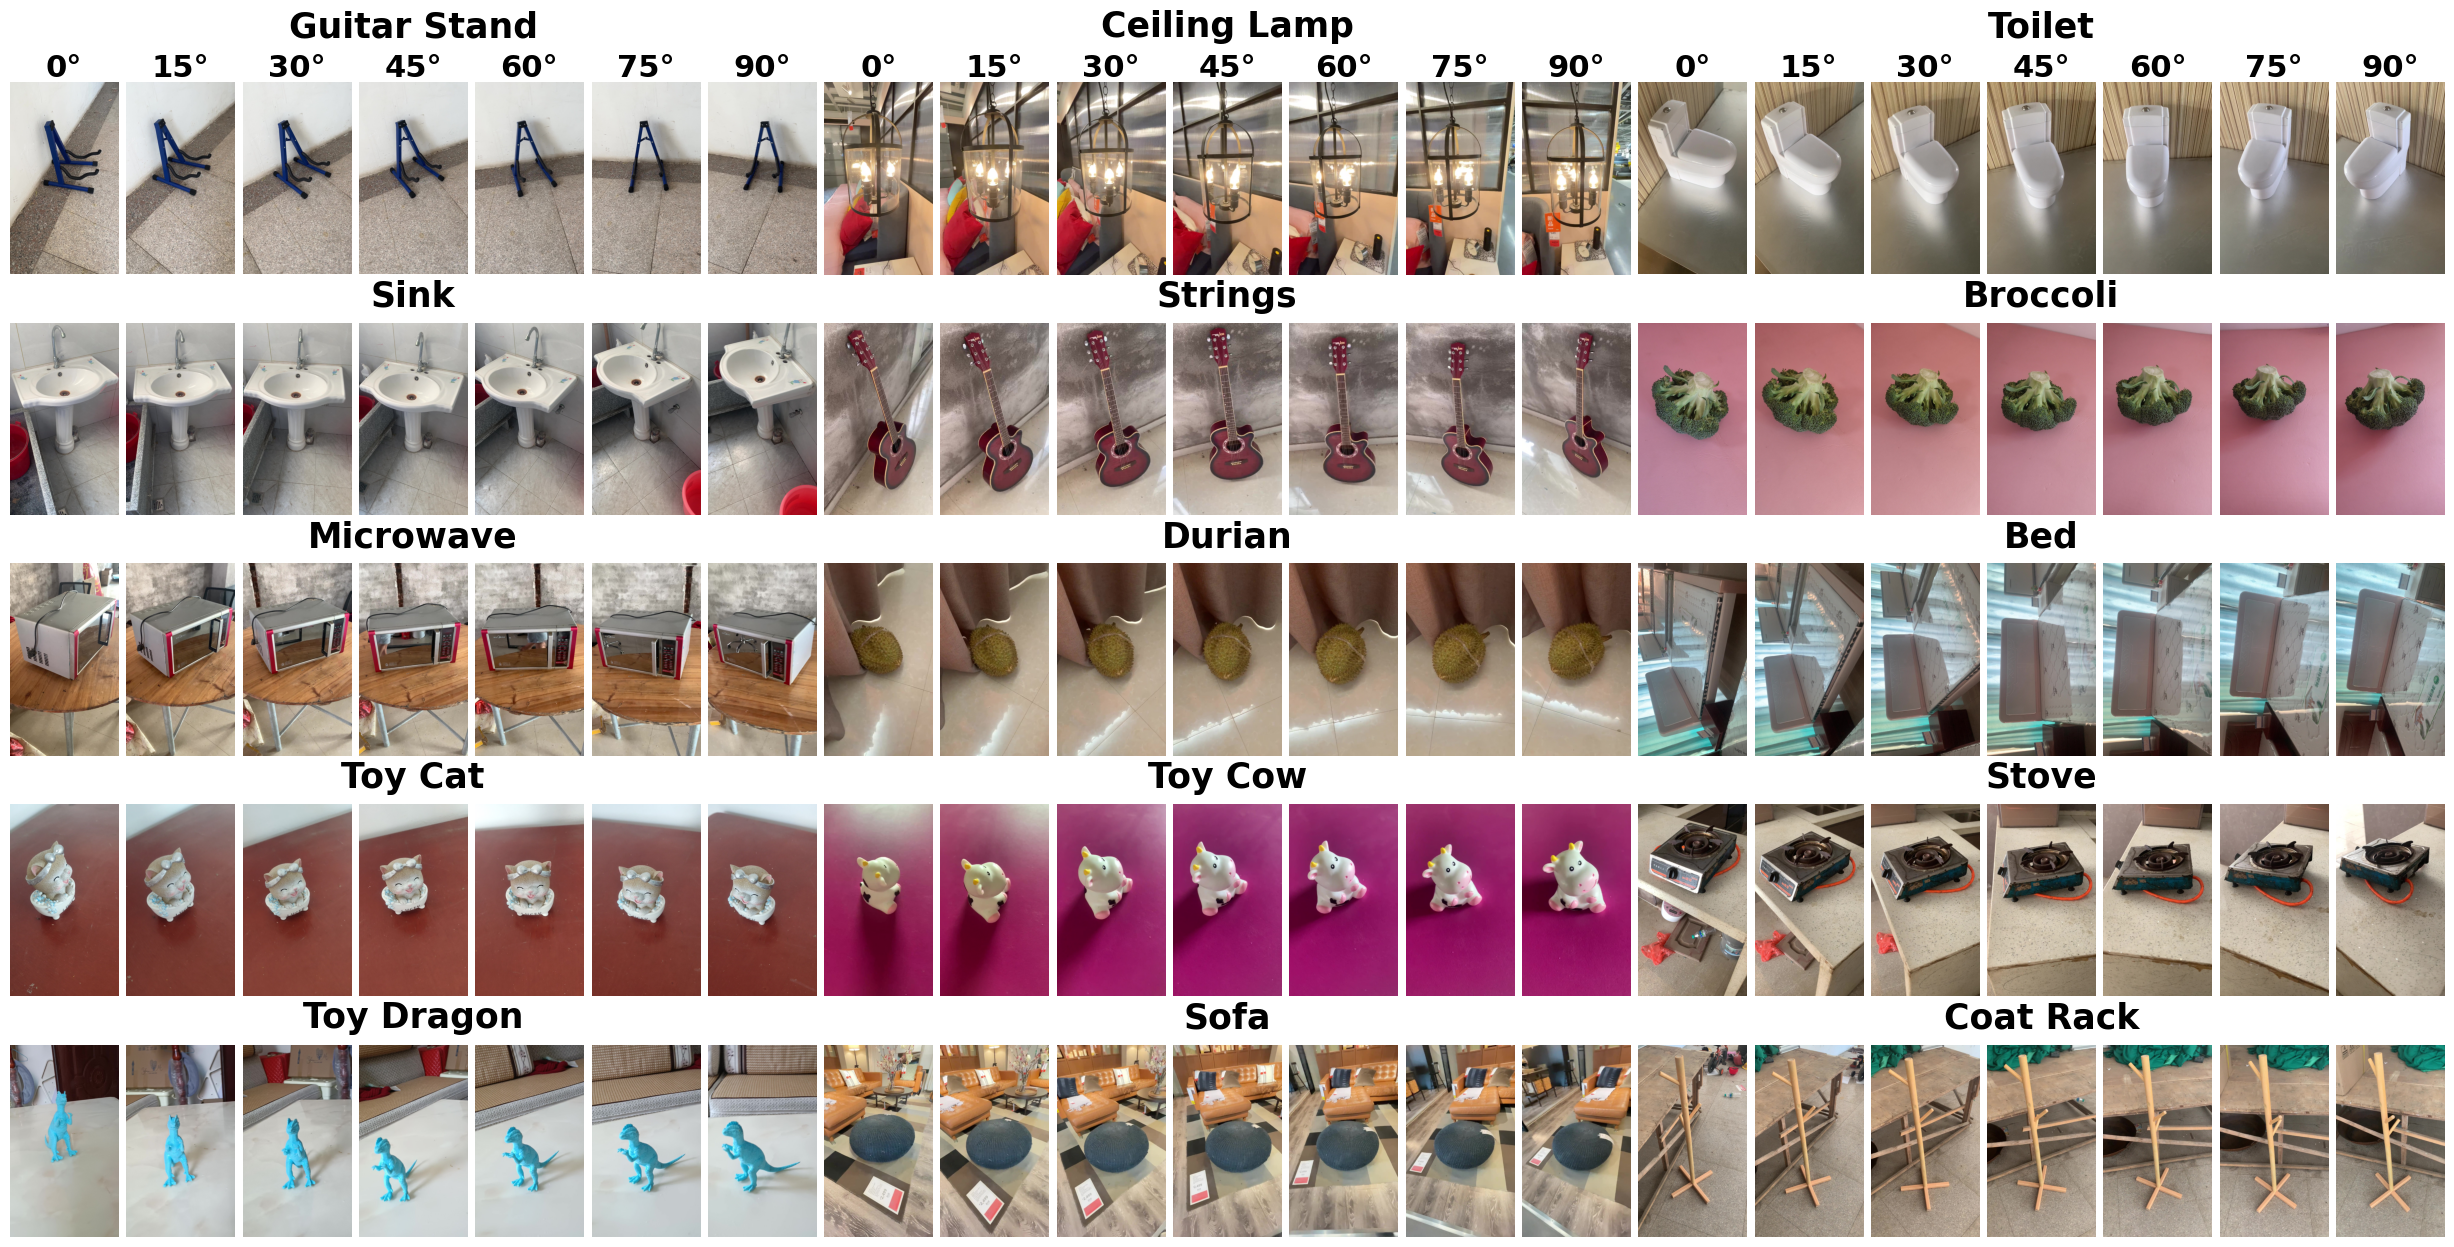

In [17]:
import math
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

# --- CONFIGURATION ---
base_path = os.path.abspath(os.path.join(os.getcwd(), "..", "datasets", "split_angles_mvimagenet"))

class_numbers = [100, 113, 125, 126, 152, 166, 19, 196, 46, 57, 60, 7, 70, 8, 99]
angle_degrees = [0, 15, 30, 45, 60, 75, 90]

class_mapping = {
    23: "Laptop", 46: "Bed", 19: "Microwave", 99: "Coat Rack", 126: "Sink", 125: "Toilet",
    8: "Sofa", 166: "Broccoli", 7: "Stove", 152: "Strings", 196: "Durian", 113: "Ceiling Lamp",
    70: "Toy Dragon", 60: "Toy Cow", 100: "Guitar Stand", 57: "Toy Cat"
}

manual_overrides = {
    "Sink": "4300efaa",
    "Strings": "1b00cfb0",
    "Microwave": "0a00c886",
    "Toy Cat": "0000a2fa",
    "Sofa": "0000b1ea",
    "Stove": "0b00bdbf"
}

rotate_classes = {"Bed"}

# --- STEP 1: COLLECT ALL ANGLES PER CLASS ---

all_angle_image_data = []

for cls in class_numbers:
    class_name = class_mapping.get(cls, str(cls))
    img_paths = []
    valid_angles = []

    if class_name in manual_overrides:
        img_id = manual_overrides[class_name]
        for angle in angle_degrees:
            angle_path = os.path.join(base_path, str(cls), str(angle), "img")
            if not os.path.exists(angle_path):
                continue
            matching_files = [f for f in os.listdir(angle_path) if f.startswith(img_id)]
            if matching_files:
                img_paths.append(os.path.join(angle_path, matching_files[0]))
                valid_angles.append(angle)
    else:
        for angle in angle_degrees:
            angle_path = os.path.join(base_path, str(cls), str(angle), "img")
            if not os.path.exists(angle_path):
                continue
            files = sorted([f for f in os.listdir(angle_path) if f.endswith(".jpg")])
            if len(files) >= 5:
                img_paths.append(os.path.join(angle_path, files[4]))
                valid_angles.append(angle)

    if len(img_paths) >= 1:
        all_angle_image_data.append((class_name, valid_angles, img_paths))


# --- STEP 2: VISUALIZE RESULTS ---

n_angles = len(angle_degrees)
n_classes = len(all_angle_image_data)
n_classes_per_row = 3
n_cols = n_classes_per_row * n_angles
n_rows = math.ceil(n_classes / n_classes_per_row)

fig, axs = plt.subplots(n_rows, n_cols, figsize=(n_cols * 1.5, n_rows * 3))
fig.subplots_adjust(hspace=0.25, wspace=0.01)
axs = np.atleast_2d(axs)

# Plot each class’s 7 views
for class_idx, (class_name, angles, img_paths) in enumerate(all_angle_image_data):
    row_idx = class_idx // n_classes_per_row
    col_start = (class_idx % n_classes_per_row) * n_angles

    for i in range(n_angles):
        ax = axs[row_idx, col_start + i]
        if angle_degrees[i] in angles:
            img_idx = angles.index(angle_degrees[i])
            img = mpimg.imread(img_paths[img_idx])
            if class_name in rotate_classes:
                img = np.rot90(img)
            ax.imshow(img)

        if row_idx == 0:
            ax.set_title(f"{angle_degrees[i]}°", fontsize=22, fontweight='bold', pad=2)

        ax.set_xticks([])
        ax.set_yticks([])
        for spine in ax.spines.values():
            spine.set_visible(False)

    # Add class name above the center image
    center_col = col_start + (n_angles // 2)
    axs[row_idx, center_col].text(
        0.5, 1.2 if row_idx == 0 else 1.05,
        class_name,
        transform=axs[row_idx, center_col].transAxes,
        ha='center', va='bottom',
        fontsize=25, fontweight='bold'
    )

# plt.tight_layout()
plt.show()


Ammending it to have less images

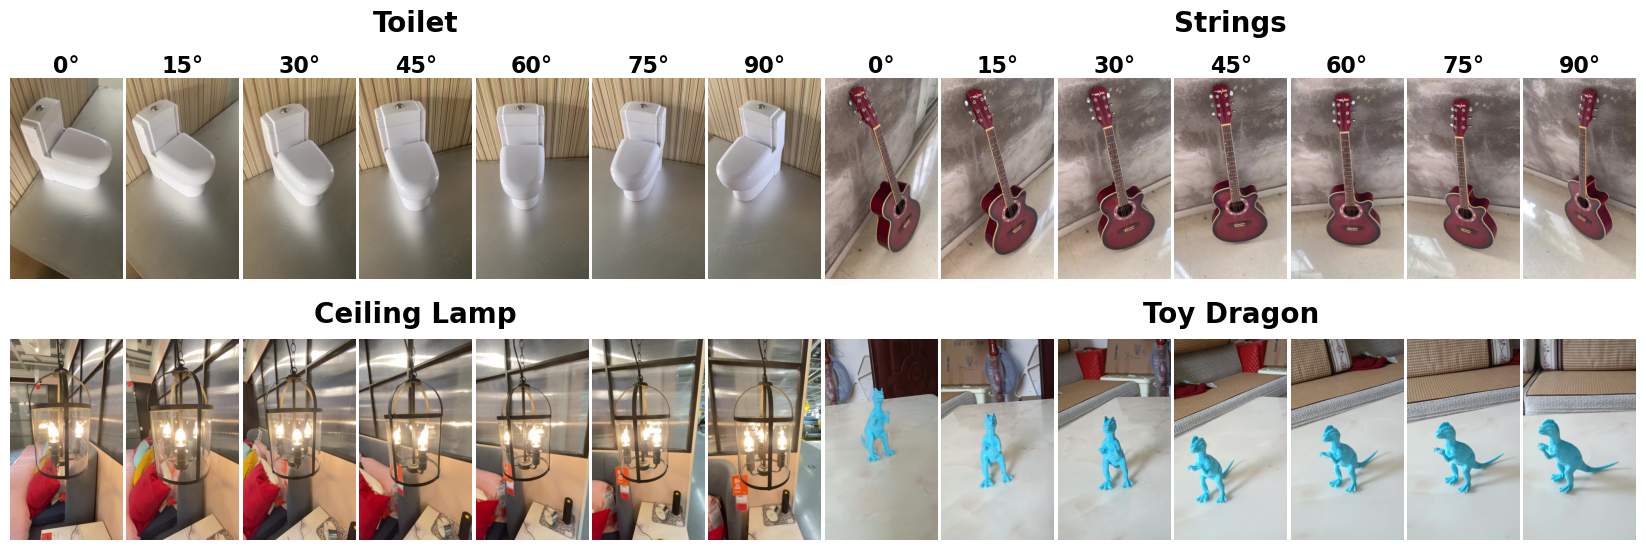

In [18]:
import math
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

# --- CONFIGURATION ---

base_path = os.path.abspath(os.path.join(os.getcwd(), "..", "datasets", "split_angles_mvimagenet"))

# Only show 4 specific classes
target_classes = ["Toilet", "Strings", "Ceiling Lamp", "Toy Dragon"]

class_mapping = {
    23: "Laptop", 46: "Bed", 19: "Microwave", 99: "Coat Rack", 126: "Sink", 125: "Toilet",
    8: "Sofa", 166: "Broccoli", 7: "Stove", 152: "Strings", 196: "Durian", 113: "Ceiling Lamp",
    70: "Toy Dragon", 60: "Toy Cow", 100: "Guitar Stand", 57: "Toy Cat"
}

# Filter only the selected classes
class_numbers = [cls for cls, name in class_mapping.items() if name in target_classes]

angle_degrees = [0, 15, 30, 45, 60, 75, 90]

manual_overrides = {
    "Sink": "4300efaa",
    "Strings": "1b00cfb0",
    "Microwave": "0a00c886",
    "Toy Cat": "0000a2fa",
    "Sofa": "0000b1ea",
    "Stove": "0b00bdbf"
}

rotate_classes = {"Bed"}  # No effect here but left for completeness

# --- STEP 1: COLLECT ALL ANGLES PER CLASS ---

all_angle_image_data = []

for cls in class_numbers:
    class_name = class_mapping.get(cls, str(cls))
    img_paths = []
    valid_angles = []

    if class_name in manual_overrides:
        img_id = manual_overrides[class_name]
        for angle in angle_degrees:
            angle_path = os.path.join(base_path, str(cls), str(angle), "img")
            if not os.path.exists(angle_path):
                continue
            matching_files = [f for f in os.listdir(angle_path) if f.startswith(img_id)]
            if matching_files:
                img_paths.append(os.path.join(angle_path, matching_files[0]))
                valid_angles.append(angle)
    else:
        for angle in angle_degrees:
            angle_path = os.path.join(base_path, str(cls), str(angle), "img")
            if not os.path.exists(angle_path):
                continue
            files = sorted([f for f in os.listdir(angle_path) if f.endswith(".jpg")])
            if len(files) >= 5:
                img_paths.append(os.path.join(angle_path, files[4]))
                valid_angles.append(angle)

    if len(img_paths) >= 1:
        all_angle_image_data.append((class_name, valid_angles, img_paths))

# --- STEP 2: VISUALIZE RESULTS ---

n_angles = len(angle_degrees)
n_classes = len(all_angle_image_data)
n_classes_per_row = 2   # 2 classes per row
n_cols = n_classes_per_row * n_angles
n_rows = math.ceil(n_classes / n_classes_per_row)

fig, axs = plt.subplots(n_rows, n_cols, figsize=(n_cols * 1.5, n_rows * 3))
fig.subplots_adjust(hspace=0.3, wspace=0.02)
axs = np.atleast_2d(axs)

# Plot each class’s 7 views
for class_idx, (class_name, angles, img_paths) in enumerate(all_angle_image_data):
    row_idx = class_idx // n_classes_per_row
    col_start = (class_idx % n_classes_per_row) * n_angles

    for i in range(n_angles):
        ax = axs[row_idx, col_start + i]
        if angle_degrees[i] in angles:
            img_idx = angles.index(angle_degrees[i])
            img = mpimg.imread(img_paths[img_idx])
            if class_name in rotate_classes:
                img = np.rot90(img)
            ax.imshow(img)

        # Add angle titles only for first row
        if row_idx == 0:
            ax.set_title(f"{angle_degrees[i]}°", fontsize=16, fontweight='bold', pad=2)

        ax.set_xticks([])
        ax.set_yticks([])
        for spine in ax.spines.values():
            spine.set_visible(False)

    # Add class name above center image
    center_col = col_start + (n_angles // 2)
    axs[row_idx, center_col].text(
        0.5, 1.2 if row_idx == 0 else 1.05,
        class_name,
        transform=axs[row_idx, center_col].transAxes,
        ha='center', va='bottom',
        fontsize=20, fontweight='bold'
    )

plt.show()


In [ ]:
import os
import pandas as pd

# Configuration
base_path = os.path.abspath(os.path.join(os.getcwd(), "..", "datasets", "split_angles_mvimagenet"))
class_numbers = [100, 113, 125, 126, 152, 166, 19, 196, 46, 57, 60, 7, 70, 8, 99]
angle_degrees = [0, 15, 30, 45, 60, 75, 90]

class_mapping = {
    23: "Laptop", 46: "Bed", 19: "Microwave", 99: "Coat Rack", 126: "Sink", 125: "Toilet",
    8: "Sofa", 166: "Broccoli", 7: "Stove", 152: "Strings", 196: "Durian", 113: "Ceiling Lamp",
    70: "Toy Dragon", 60: "Toy Cow", 100: "Guitar Stand", 57: "Toy Cat"
}

# Create a DataFrame to store the count data
count_data = []

for cls in class_numbers:
    class_name = class_mapping.get(cls, str(cls))
    row = {"Class": f"{cls}: {class_name}"}
    for angle in angle_degrees:
        angle_path = os.path.join(base_path, str(cls), str(angle), "img")
        if os.path.exists(angle_path):
            count = len([f for f in os.listdir(angle_path) if f.endswith(".jpg")])
        else:
            count = 0
        row[f"{angle}°"] = count
    count_data.append(row)

# Convert to DataFrame and display
df_counts = pd.DataFrame(count_data)



In [20]:
df_counts

Class   0°  15°  30°  45°  60°  75°  90°
0   100: Guitar Stand    3    3    3    3    3    3    3
1   113: Ceiling Lamp   75   75   75   75   75   75   75
2         125: Toilet    5    5    5    5    5    5    5
3           126: Sink    5    5    5    5    5    5    5
4        152: Strings  121  121  121  121  121  121  121
5       166: Broccoli  210  210  210  210  210  210  210
6       19: Microwave  120  120  120  120  120  120  120
7         196: Durian  758  758  758  758  758  758  758
8             46: Bed   23   23   23   23   23   23   23
9         57: Toy Cat  762  762  762  762  762  762  762
10        60: Toy Cow  697  697  697  697  697  697  697
11           7: Stove  197  197  197  197  197  197  197
12     70: Toy Dragon  625  625  625  625  625  625  625
13            8: Sofa   91   91   91   91   91   91   91
14      99: Coat Rack    9    9    9    9    9    9    9